<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2024/blob/main/IMT_TFIDF_Sentiment_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **CASE**: Avaliação de aplicativos de comida do Google Play

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data

Essa informações podem ser obtidas a partir de [web scraping do Google Play](https://colab.research.google.com/github/Rogerio-mack/IMT_Ciencia_de_Dados/blob/main/IMT_Sentiment_Analysis_TFIDF_solucao.ipynb#scrollTo=U4Xpam-YYN0D), e talvez você possa buscar outras informações ou fazer o mesmo para lojas da Apple.

In [100]:
df = pd.read_csv("https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/app_reviews_df.csv")
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,5bb50b12-d3c0-4410-a7c7-d58931eecefc,Reinaldo Castro,https://play-lh.googleusercontent.com/a-/ALV-U...,"Uso bastante pra fazer mercado, mas, nas últim...",2,213,9.227.0,2023-10-10 21:03:49,NaN,NaN,9.227.0,most_relevant,br.com.brainweb.ifood
1,23438b56-fc66-49a5-bab8-b340b2ba20ac,Karina F S (Akarinaluz),https://play-lh.googleusercontent.com/a-/ALV-U...,Fiz uma compra que tinha desconto e não entrou...,1,487,9.226.0,2023-10-01 10:53:46,NaN,NaN,9.226.0,most_relevant,br.com.brainweb.ifood
2,04326939-0402-4fba-8fa9-c804c6990638,Luiz Felipe Tavares Cancian,https://play-lh.googleusercontent.com/a-/ALV-U...,"Aplicativo não funciona mais, os pedidos são f...",1,237,9.226.0,2023-09-29 23:06:49,NaN,NaN,9.226.0,most_relevant,br.com.brainweb.ifood
3,eb08efe5-184d-46aa-b9a1-21b0315961a1,Rodrigo Jordão,https://play-lh.googleusercontent.com/a-/ALV-U...,"Quando o carrinho de mercado está muito cheio,...",1,423,9.228.0,2023-10-14 21:18:28,NaN,NaN,9.228.0,most_relevant,br.com.brainweb.ifood
4,34a866ed-31db-4329-bbbb-3e9d3d806447,César de Lucca,https://play-lh.googleusercontent.com/a-/ALV-U...,O app é muito bom! O problema é o atendimento....,5,53,9.226.0,2023-09-30 03:13:12,NaN,NaN,9.226.0,most_relevant,br.com.brainweb.ifood


# Sentiment from score

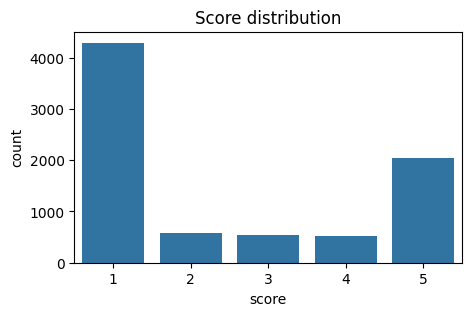

In [101]:
plt.figure(figsize=(5,3))

sns.countplot(x='score',data=df)
plt.title('Score distribution')
plt.show()

**negativo** se `score` $= 1$,

**neutro** se `score` $= 2,3,4$,

**positivo** se `score` $= 5$

In [102]:
df['sentiment'] = df.score.replace([1,2,3,4,5],['NEGATIVE','NEUTRAL','NEUTRAL','NEUTRAL','POSITIVE'])

In [103]:
df = df[['appId','content','score','sentiment']]
df.head()

,appId,content,score,sentiment
0,br.com.brainweb.ifood,"Uso bastante pra fazer mercado, mas, nas últim...",2,NEUTRAL
1,br.com.brainweb.ifood,Fiz uma compra que tinha desconto e não entrou...,1,NEGATIVE
2,br.com.brainweb.ifood,"Aplicativo não funciona mais, os pedidos são f...",1,NEGATIVE
3,br.com.brainweb.ifood,"Quando o carrinho de mercado está muito cheio,...",1,NEGATIVE
4,br.com.brainweb.ifood,O app é muito bom! O problema é o atendimento....,5,POSITIVE


# `Scikit-learn` TfidfVectorizer

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['content'])

tfidf_matrix.shape, tfidf_matrix.toarray()[0][ tfidf_matrix.toarray()[0] != 0 ], vectorizer.get_feature_names_out()[0:50]

((8000, 5075),
 array([0.17166266, 0.1102932 , 0.12002502, 0.11988426, 0.08745452,
        0.10433866, 0.19499987, 0.18057787, 0.15238677, 0.17166266,
        0.14927351, 0.18057787, 0.05396788, 0.06063378, 0.12256049,
        0.15236791, 0.1601108 , 0.14175204, 0.13794591, 0.07840475,
        0.0975157 , 0.15592577, 0.15236791, 0.16519244, 0.07930726,
        0.13307317, 0.1283427 , 0.10664156, 0.11747884, 0.126673  ,
        0.11266265, 0.03859001, 0.18057787, 0.06376902, 0.07767795,
        0.1601108 , 0.18057787, 0.10919146, 0.06766124, 0.13030337,
        0.11329382, 0.19499987, 0.14132372, 0.12650795, 0.14408053,
        0.09852547, 0.16519244, 0.06516564, 0.17896334, 0.09784755,
        0.08723958, 0.10762897, 0.1061628 , 0.09144108, 0.10305684,
        0.07855281, 0.13794591, 0.11905514, 0.15236791]),
 array(['00', '01', '02', '03', '05', '07', '08', '0800', '09', '0ara',
        '10', '100', '1000', '11', '117', '12', '120hz', '13', '130',
        '136', '14', '14hs', '15', '1

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 3),max_features=4096)
tfidf_matrix = vectorizer.fit_transform(df['content'])

tfidf_matrix.shape, tfidf_matrix.toarray()[0][ tfidf_matrix.toarray()[0] != 0 ], vectorizer.get_feature_names_out()[0:50]

((8000, 4096),
 array([0.10033978, 0.10919336, 0.14566159, 0.12720227, 0.1090653 ,
        0.07956218, 0.09492261, 0.13863462, 0.13580231, 0.11328996,
        0.13861746, 0.15617095, 0.13580231, 0.04909755, 0.12549697,
        0.05516188, 0.14185424, 0.11150001, 0.13861746, 0.14566159,
        0.12895962, 0.13580231, 0.14185424, 0.12549697, 0.07132911,
        0.08871539, 0.14185424, 0.13861746, 0.15028464, 0.07215017,
        0.12106397, 0.14185424, 0.1167604 , 0.11738632, 0.09701768,
        0.10687696, 0.11524138, 0.10249541, 0.03510745, 0.05801418,
        0.11976741, 0.0706679 , 0.14566159, 0.14566159, 0.14566159,
        0.09933747, 0.06155515, 0.12391626, 0.11854414, 0.10306961,
        0.12856995, 0.11509123, 0.09338131, 0.13107797, 0.08963403,
        0.15028464, 0.05928477, 0.16281278, 0.08901729, 0.11237649,
        0.07936664, 0.09791599, 0.108311  , 0.15028464, 0.09658213,
        0.15617095, 0.08318897, 0.13861746, 0.09375647, 0.0714638 ,
        0.12549697, 0.108311  , 0

# `Scikit-learn` KNeighborsClassifier

In [106]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X = tfidf_matrix
y = df.sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

clf = KNeighborsClassifier(metric='cosine')

clf.fit(X_train,y_train)

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

    NEGATIVE       0.92      0.91      0.92      1289
     NEUTRAL       0.79      0.73      0.76       496
    POSITIVE       0.84      0.92      0.88       615

    accuracy                           0.88      2400
   macro avg       0.85      0.85      0.85      2400
weighted avg       0.88      0.88      0.87      2400

CPU times: user 700 ms, sys: 184 ms, total: 884 ms
Wall time: 886 ms


# `Scikit-learn` Ensemble Models

In [107]:
%%time
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train,y_train)

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

    NEGATIVE       1.00      1.00      1.00      1289
     NEUTRAL       0.99      0.95      0.97       496
    POSITIVE       0.95      1.00      0.97       615

    accuracy                           0.99      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.99      0.99      0.99      2400

CPU times: user 4.09 s, sys: 810 µs, total: 4.09 s
Wall time: 4.08 s


In [108]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()

clf.fit(X_train,y_train)

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

    NEGATIVE       0.86      0.97      0.91      1289
     NEUTRAL       0.97      0.54      0.69       496
    POSITIVE       0.84      0.93      0.88       615

    accuracy                           0.87      2400
   macro avg       0.89      0.81      0.83      2400
weighted avg       0.88      0.87      0.86      2400

CPU times: user 17.7 s, sys: 0 ns, total: 17.7 s
Wall time: 17.8 s


# `Scikit-learn` MLP

In [109]:
%%time
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1)

clf.fit(X_train, y_train)

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

    NEGATIVE       1.00      1.00      1.00      1289
     NEUTRAL       0.99      0.95      0.97       496
    POSITIVE       0.95      1.00      0.97       615

    accuracy                           0.99      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.99      0.99      0.99      2400

CPU times: user 24.3 s, sys: 18.1 s, total: 42.4 s
Wall time: 26.2 s


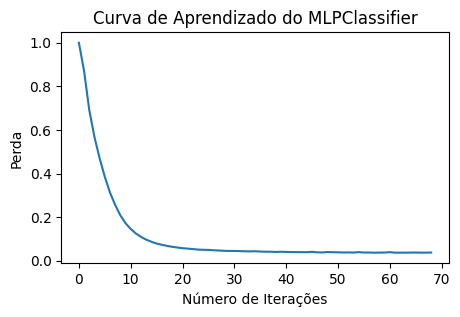

In [110]:
plt.figure(figsize=(5,3))
loss_curve = clf.loss_curve_

plt.plot(loss_curve)
plt.xlabel('Número de Iterações')
plt.ylabel('Perda')
plt.title('Curva de Aprendizado do MLPClassifier')
plt.show()

# Deep Learning

Frameworks de deep learning como o TensorFlow e PyTorch fornecem representação por Tensores, processamento em GPU, Auto Gradiente e otimização por Grafos de Execução, e permitem construir diferentes tipos de rede diferindo bastante do `scikit-learn` que, dentre outras coisas só implementa os modelos perceptron e MLP. Para saber mais você pode acessar https://github.com/Rogerio-mack/Deep-Learning-I.




In [111]:
%%time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')  # NEGATIVE, NEUTRAL, POSITIVE
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Convert y_train to numerical labels (0, 1, 2)
label_map = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
y_train_numerical = np.array([label_map[label] for label in y_train])

# Train the model
history = model.fit(X_train.toarray(), y_train_numerical, epochs=10)

# Evaluate the model
y_pred_probs = model.predict(X_test.toarray())
y_pred = [list(label_map.keys())[list(label_map.values()).index(i)] for i in np.argmax(y_pred_probs, axis=1)]

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6038 - loss: 0.8610
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9660 - loss: 0.1444
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9836 - loss: 0.0564
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9855 - loss: 0.0420
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9851 - loss: 0.0392
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9814 - loss: 0.0414
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9838 - loss: 0.0402
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9802 - loss: 0.0389
Epoch 9/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9844 - loss: 0.0312
Epoch 10/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9860 - loss: 0.0328
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

    NEGATIVE       1.00      1.00      1.00  

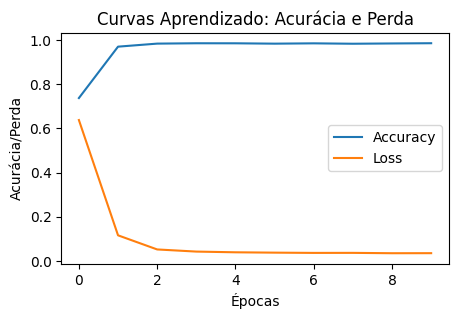

In [112]:
plt.figure(figsize=(5, 3))
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['loss'],label='Loss')
plt.title('Curvas Aprendizado: Acurácia e Perda')
plt.ylabel('Acurácia/Perda')
plt.xlabel('Épocas')
plt.legend()
plt.show()



In [113]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X = tfidf_matrix
y = df.sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

clf = GradientBoostingClassifier()

clf.fit(X_train,y_train)

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

    NEGATIVE       0.87      0.96      0.91      1289
     NEUTRAL       0.98      0.57      0.72       496
    POSITIVE       0.82      0.92      0.87       615

    accuracy                           0.87      2400
   macro avg       0.89      0.82      0.83      2400
weighted avg       0.88      0.87      0.86      2400

CPU times: user 18.6 s, sys: 1.41 ms, total: 18.6 s
Wall time: 18.8 s


# LLM Bert, Sentiment Classifier

Grandes modelos de linguagem, como o ChatGPT, Llama, Gemini ou Bert, já treinados podem ser refinados (retreinados com seus dados) ou empregados diretamente. Aqui é empregado diretamente (sem ajuste) um modelo aberto https://huggingface.co/lucas-leme/FinBERT-PT-BR treinado com 1.4 milhões de textos do mercado financeiro em português para análise de sentimento.   

In [114]:
np.random.seed(42)
df_short = df.iloc[ np.random.randint(0, len(df), size=100) ].reset_index(drop=True)
df_short.rename(columns={'score':'score_app'}, inplace=True)
display(df_short.head()), df_short.sentiment.value_counts()

,appId,content,score_app,sentiment
0,com.vanuatu.aiqfome,"Fico surpreso, como um aplicativo tão famoso p...",1,NEGATIVE
1,com.vanuatu.aiqfome,Acho a interface do app confusa pois as mesmas...,3,NEUTRAL
2,br.com.brainweb.ifood,Vendedor pode bloquiar o comprador de entrar n...,5,POSITIVE
3,com.grability.rappi,"Asco de aplicación, le roban la plata a uno",1,NEGATIVE
4,com.grability.rappi,O suporte deles é PÉSSIMO. Se algo de errado a...,1,NEGATIVE


(None,
 sentiment
 NEGATIVE    54
 POSITIVE    26
 NEUTRAL     20
 Name: count, dtype: int64)

In [115]:
%%time
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("lucas-leme/FinBERT-PT-BR")
model = BertForSequenceClassification.from_pretrained("lucas-leme/FinBERT-PT-BR")

pipeline = pipeline(task='text-classification', model=model, tokenizer=tokenizer)
print(pipeline(['Hoje a bolsa caiu', 'Hoje a bolsa subiu']))

results = pipeline(df_short['content'].tolist())

df_short = pd.concat([df_short, pd.DataFrame(results)], axis=1)
df_short.head()

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[{'label': 'NEGATIVE', 'score': 0.7304731607437134}, {'label': 'POSITIVE', 'score': 0.5405580997467041}]
CPU times: user 30 s, sys: 40.1 ms, total: 30.1 s
Wall time: 31.2 s


,appId,content,score_app,sentiment,label,score
0,com.vanuatu.aiqfome,"Fico surpreso, como um aplicativo tão famoso p...",1,NEGATIVE,NEGATIVE,0.506049
1,com.vanuatu.aiqfome,Acho a interface do app confusa pois as mesmas...,3,NEUTRAL,NEGATIVE,0.534474
2,br.com.brainweb.ifood,Vendedor pode bloquiar o comprador de entrar n...,5,POSITIVE,NEGATIVE,0.818941
3,com.grability.rappi,"Asco de aplicación, le roban la plata a uno",1,NEGATIVE,NEUTRAL,0.606748
4,com.grability.rappi,O suporte deles é PÉSSIMO. Se algo de errado a...,1,NEGATIVE,NEGATIVE,0.791354


In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score

print('Similaridade: ', accuracy_score(df_short['sentiment'], df_short['label']))
print()

cm = confusion_matrix(df_short['sentiment'], df_short['label'])

print(pd.DataFrame(cm,
                  index=['score ' + label for label in df_short['sentiment'].unique()],
                  columns=['bert  ' + label for label in df_short['label'].unique()]))

Similaridade:  0.62

                bert  NEGATIVE  bert  NEUTRAL  bert  POSITIVE
score NEGATIVE              50              4               0
score NEUTRAL               14              6               0
score POSITIVE               5             15               6
